Dataset: [Medical Cost Personal Datasets
](https://www.kaggle.com/datasets/mirichoi0218/insurance)

# 1: Importar librerías

In [83]:
!pip install pyjanitor
import janitor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import make_column_transformer
# import sklearn.metrics as metrics
# metrics.mean_squared_error ó r2_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2. Cargar Dataset

In [84]:
df = pd.read_csv("/content/insurance.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Explorar los datos

In [85]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [86]:
df.isna().sum().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

## Datos Atípicos (Outliers)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


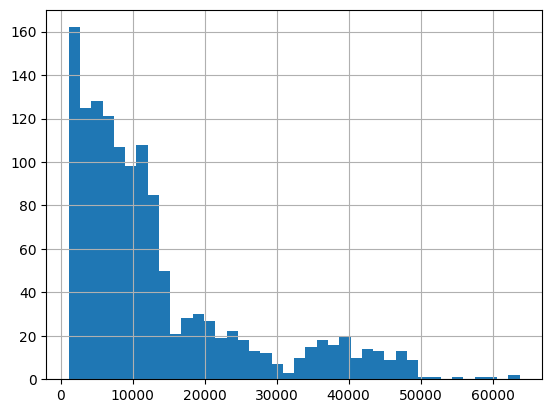

In [87]:
df.charges.hist(bins=40)
plt.show()

### Tratamiento de los outliers con IQ

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='charges'>

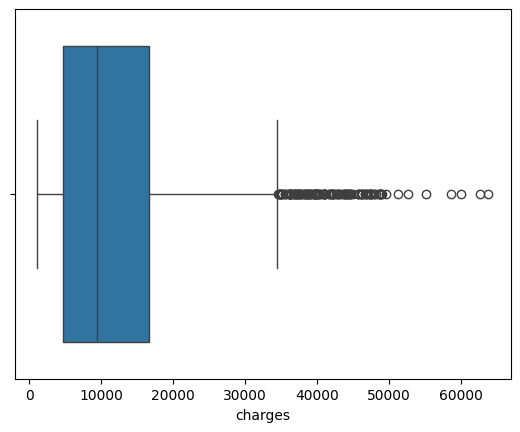

In [88]:
Q1 = np.percentile(df.charges, 25)
Q3 = np.percentile(df.charges, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df.charges[(df.charges < lower_bound) | (df.charges > upper_bound)]
outliers.head()
outliers.value_counts().sum()

# df = df[(df.charges>=lower_bound) & (df.charges<=upper_bound)]
# df.shape
# Outliers
sns.boxplot(x=df.charges)

### Tratamiento de los outliers con Transformación Logarítmica

In [97]:
df["charges_log"] = np.log1p(df.charges)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


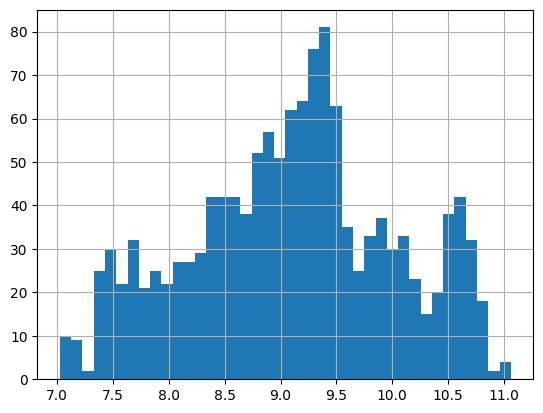

In [98]:
df["charges_log"].hist(bins=40)
plt.show()

# 4. Correlaciones

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


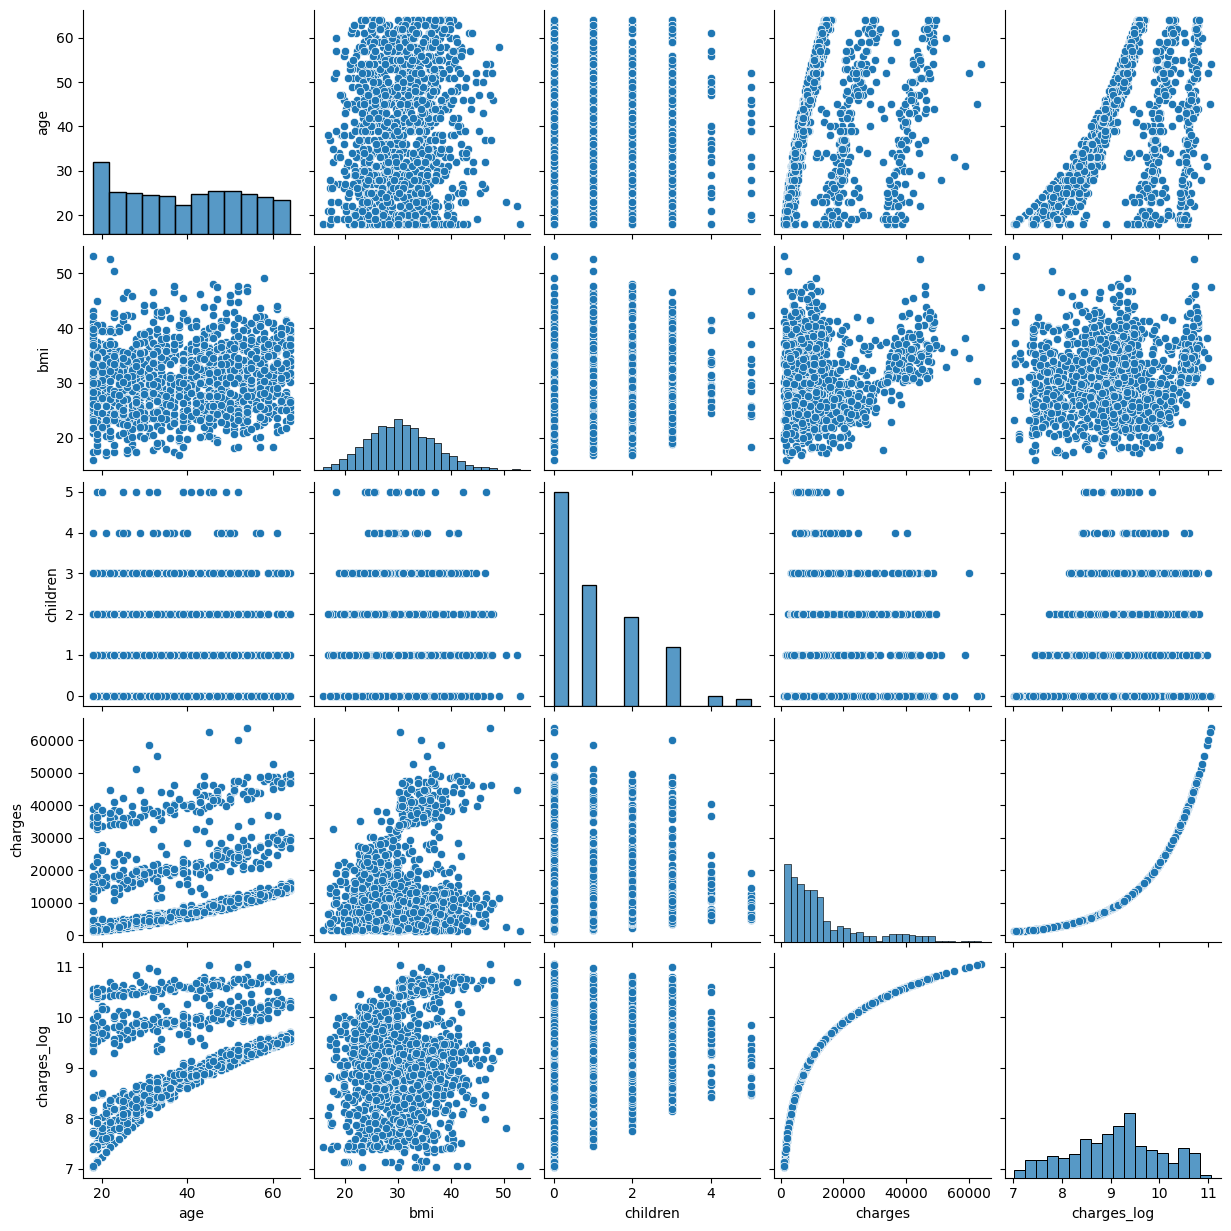

In [38]:
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


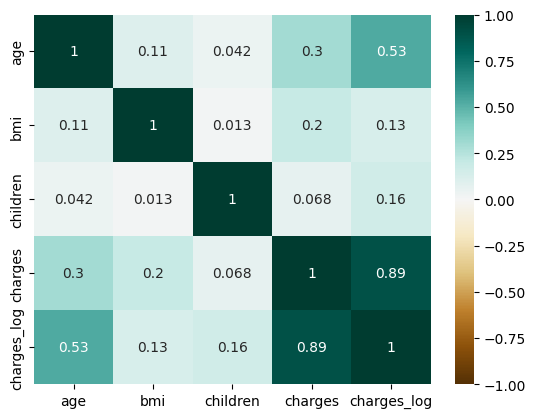

In [46]:
sns.heatmap(
    data=df.corr(numeric_only=True),
    cmap="BrBG",
    vmin=-1,
    vmax=1,
    annot=True,
)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


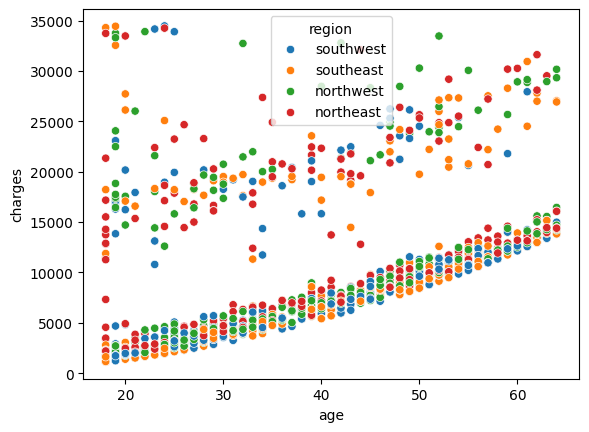

In [ ]:
sns.scatterplot(data=df, x=df.age, y=df.charges, hue=df.region)
plt.show()

# 5. Codificación de variables categóricas

In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(), ["sex", "smoker", "region"]),
    remainder="passthrough"
)
transformer

In [103]:
transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df),
        columns = transformer.get_feature_names_out(),
        index = df.index
    )
    .rename_columns(
        function = lambda x: x.removeprefix("onehotencoder__")
    )
    .rename_columns(
        function = lambda x: x.removeprefix("remainder__")
    )
)
transformed_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children,charges,charges_log
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400,9.734236
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230,7.453882
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200,8.400763
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061,9.998137
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520,8.260455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830,9.268755
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080,7.699381
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350,7.396847
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500,7.605365


#6. Crear modelo de regresión lineal múltiple

In [ ]:
X_cols = list(set(transformed_df.columns) - set(["charges", "charges_log"]))
X_cols

In [ ]:
y_col = ["charges_log"]

In [136]:
X = transformed_df[X_cols].values
y = transformed_df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=False)

scaler_x = StandardScaler().fit(X)
scaler_y = StandardScaler().fit(y)

X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Métricas del modelo

In [137]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print("r2: ", np.round(r2,4)) # mide que tan bien predice el modelo
print("rmse: ", np.round(rmse,4)) # mide el error de las predicciones

r2:  0.7045
rmse:  0.535


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
